# 가사분석 기반 음악 추천 시스템

## 멜론 음원사이트 - 곡 장르, 가사, 리뷰정보 2000년~2020년 월간 top100 정보 가져오기

### 필요한 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import time
from bs4 import BeautifulSoup
import urllib.request
import urllib.parse
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt


#### 드라이버 설정

In [2]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('headless')    # 웹 브라우저를 띄우지 않는 headless chrome 옵션 적용
options.add_argument('disable-gpu')    # GPU 사용 안함
options.add_argument('lang=ko_KR')    # 언어 설정
driver = webdriver.Chrome('./chromedriver.exe', options=options) #  옵션 적용

### 2000년~2019년 top100차트 가져오기

In [3]:
## 2000 ~ 2019년
# from 
rankDATE=[]
name=[]
code=[]
from tqdm.notebook import tqdm
import time
from bs4 import BeautifulSoup
# 홈페이지 접속
options = webdriver.ChromeOptions()
options.add_argument('headless')    # 웹 브라우저를 띄우지 않는 headless chrome 옵션 적용
options.add_argument('disable-gpu')    # GPU 사용 안함
options.add_argument('lang=ko_KR')    # 언어 설정
driver = webdriver.Chrome('../chromedriver.exe', options=options) #  옵션 적용
driver.get('https://www.melon.com/chart/month/index.htm')
driver.find_element_by_xpath('//*[@id="conts"]/div[3]/div/button').click()
driver.find_element_by_xpath('//*[@id="conts"]/div[3]/div/div/dl/dd[2]/a').click()
driver.find_element_by_xpath('//*[@id="d_chart_search"]/div/h4[2]/a').click()# 월별 차트 클릭
time.sleep(5)
for i in tqdm(range(2,4)):
    element = driver.find_element_by_xpath('//*[@id="decade_{}"]'.format(str(i))) #년대 선택
    driver.execute_script("arguments[0].click();", element) 
    for j in tqdm(range(1,11)):
        element2 = driver.find_element_by_xpath('//*[@id="year_{}"]'.format(str(j))) # 년도 선택
        driver.execute_script("arguments[0].click();", element2) 
        for k in tqdm(range(1,13)):
            element3 = driver.find_element_by_xpath('//*[@id="month_{}"]'.format(str(k))) # 월 선택
            driver.execute_script("arguments[0].click();", element3)
            time.sleep(5)
            if (i==3 and (j in range(6,11)) ):##2004년까지
                element4 = driver.find_element_by_xpath('//*[@id="gnr_1"]')  # 장르 선택
                driver.execute_script("arguments[0].click();", element4)
                time.sleep(5)
                driver.find_element_by_xpath('//*[@id="d_srch_form"]/div[2]/button').click()
                time.sleep(5)
                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                for l in soup.find_all('input',{'name':"input_check"}):
                    name.append(l.get('title')[:-5])
                    code.append(l.get('value'))       
            else :  # 2005년 ~2019년 12월
                element5 = driver.find_element_by_xpath('//*[@id="gnr_2"]')
                time.sleep(5)
                driver.execute_script("arguments[0].click();", element5) # 장르 선택
                time.sleep(5)
                driver.find_element_by_xpath('//*[@id="d_srch_form"]/div[2]/button').click()
                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                for l in soup.find_all('input',{'name':"input_check"}):
                    name.append(l.get('title')[:-5])
                    code.append(l.get('value'))
                    rankDATE.append('20{}{}년 {}월'.format((3-i),(10-j),k))
               

### 2020년 top100차트 가져오기

In [4]:
# ##2020년
# # 홈페이지 접속
# # options = webdriver.ChromeOptions()
# # options.add_argument('headless')    # 웹 브라우저를 띄우지 않는 headless chrome 옵션 적용
# # options.add_argument('disable-gpu')    # GPU 사용 안함
# # options.add_argument('lang=ko_KR')    # 언어 설정
# name2=[]
# code2=[]
# date=[]
# driver = webdriver.Chrome('../chromedriver.exe') #  옵션 적용
# driver.get('https://www.melon.com/chart/month/index.htm')
# driver.find_element_by_xpath('//*[@id="conts"]/div[3]/div/button').click()
# driver.find_element_by_xpath('//*[@id="conts"]/div[3]/div/div/dl/dd[2]/a').click()
# driver.find_element_by_xpath('//*[@id="d_chart_search"]/div/h4[2]/a').click()# 월별 차트 클릭
# time.sleep(1)
# element = driver.find_element_by_xpath('//*[@id="decade_1"]') #년대 선택
# driver.execute_script("arguments[0].click();", element) 
# time.sleep(3)
# element2 = driver.find_element_by_xpath('/html/body/div/div[3]/div/div/form/div[1]/div/div/div[2]/div[1]/ul/li/span/input') # 년도 선택
# driver.execute_script("arguments[0].click();", element2) 

# for k in tqdm(range(1,8)):
#             element3 = driver.find_element_by_xpath('//*[@id="month_{}"]'.format(str(k))) # 월 선택
#             driver.execute_script("arguments[0].click();", element3)
#             time.sleep(1)
#             element4 = driver.find_element_by_xpath('//*[@id="gnr_2"]')  # 장르 선택
#             time.sleep(1)
#             driver.execute_script("arguments[0].click();", element4)
#             driver.find_element_by_xpath('//*[@id="d_srch_form"]/div[2]/button').click()
#             html = driver.page_source
#             soup = BeautifulSoup(html, 'html.parser')
#             for l in soup.find_all('input',{'name':"input_check"}):
#                 name2.append(l.get('title')[:-5])
#                 code2.append(l.get('value'))


#### 2000~2019년 곡정보 + 2020년 곡 이름,코드 하나의 데이터프레임으로 합치기

In [5]:
# df = pd.DataFrame(name,code).reset_index()
# df2 = pd.DataFrame(name2,code2).reset_index()
# df3= pd.concat([df,df2])
# df3.columns =['code','name']

#### 2000년~2020년의 데이터 중복제거

In [6]:
# top100=df3.drop_duplicates(['code']).reset_index(drop=True)

#### csv파일로 저장

In [7]:
# df3.to_csv("곡이름코드원본.csv",encoding='cp949',index=False)
# top100.to_csv("곡이름코드.csv",encoding='cp949',index=False)
# df.to_csv("곡이름.csv")

In [8]:
df = pd.read_csv("곡이름코드.csv",encoding='cp949')
df

code         name
0     31532643         넘쳐흘러
1     31532438       벌써 12시
2     31477685         180도
3     31406357          신용재
4     31417871         SOLO
...        ...          ...
7755  32620704      Poppin'
7756  32620703   Underwater
7757  32665408          작사가
7758  32620701  R U Ridin'?
7759  32620705        Ghost

[7760 rows x 2 columns]

### 2000년~2020년의 곡이름에 대한 정보(가사, 가수,장르,댓글정보, 발매일) 가져오기

In [9]:
# import pandas as pd
# import numpy as np
# from tqdm.notebook import tqdm
# import time
# from bs4 import BeautifulSoup
# import urllib.request
# import urllib.parse
# import requests
# lyric=[]
# artist=[]
# date=[]
# comment=[]
# commentlist=[]
# genre=[]
# hdr = { 'User-Agent' : 'Mozilla/5.0'} #헤더설정
# lyric=[]
# artist=[]
# date=[]
# comment=[]
# commentlist=[]
# genre=[]
# for i in tqdm(df['code'][7000:7760]):
#     url='https://www.melon.com/song/detail.htm?songId={}'.format(i)
#     req = urllib.request.Request(url, headers=hdr)
#     html=urllib.request.urlopen(req).read()
#     soup = BeautifulSoup(html,'html.parser')
#     try:
#         artist.append(soup.find('div',class_='artist').text[1:-1])
#     except Exception as err:
#         artist.append(None)
#     try:
#         date.append(soup.select('#downloadfrm > div > div > div.entry > div.meta > dl.list > dd')[1].text)
#     except Exception as err:
#         date.append(None)
#     try:
#         genre.append(soup.select('#downloadfrm > div > div > div.entry > div.meta > dl.list > dd')[2].text)
#     except Exception as err:
#         genre.append(None)
#     try:
#         lyric.append(soup.find('div',class_='lyric').text[9:-1])
#     except Exception as err: 
#         lyric.append(None)
        
# # # 댓글에 대한 정보, 동적인 페이지라 driver사용 (추천수 댓글 10개만)
# #     url2 = 'https://www.melon.com/song/detail.htm?songId={}#cmtpgn=&pageNo=1&sortType=1&srchType=2&srchWord'.format(i)
# #     driver = webdriver.Chrome('./chromedriver.exe',options=options) #  옵션 적용
# #     driver.get(url2)
# #     html = driver.page_source
# #     soup = BeautifulSoup(html,'html.parser')
# #     for k in soup.find_all('div',class_='cntt')[4:9]:
# #         try:
# #             comment.append(k.text[16:-2])
# #         except AttributeError as err:
# #             comment.append(None)
# #     commentlist.append(comment)
    


### 댓글정보가 크롤링이 막혀 우선은 가사정보로만 감성분석하기로 결정

In [10]:
### 가사정보도 크롤링이 한번에 되지 않아 7760개의 데이터를 나눠서 크롤링해왔다

In [11]:
# s1000 = pd.DataFrame(data={'artist':artist, 'genre':genre, 'lyric':lyric ,'date':date})
# s1000.to_csv('s1000.csv',encoding='utf-8',index=False)

In [12]:
# s2000 = pd.DataFrame(data={'artist':artist, 'genre':genre, 'lyric':lyric ,'date':date})
# s2000.to_csv('s2000.csv',encoding='utf-8',index=False)

In [13]:
# s3000 = pd.DataFrame(data={'artist':artist, 'genre':genre, 'lyric':lyric ,'date':date})
# s3000.to_csv('s3000.csv',encoding='utf-8',index=False)

In [14]:
# s4000 = pd.DataFrame(data={'artist':artist, 'genre':genre, 'lyric':lyric ,'date':date})
# s4000.to_csv('s3000.csv',encoding='utf-8',index=False)

In [15]:
# s5000 = pd.DataFrame(data={'artist':artist, 'genre':genre, 'lyric':lyric ,'date':date})
# s5000.to_csv('s5000.csv',encoding='utf-8',index=False)

In [16]:
# s6000 = pd.DataFrame(data={'artist':artist, 'genre':genre, 'lyric':lyric ,'date':date})
# s6000.to_csv('s6000.csv',encoding='utf-8',index=False)

In [17]:
# s6500 = pd.DataFrame(data={'artist':artist[1000:], 'genre':genre[1000:], 'lyric':lyric[1000:] ,'date':date[1000:]})
# s6500.to_csv('s6500.csv',encoding='utf-8',index=False)

In [18]:
# s7000 = pd.DataFrame(data={'artist':artist, 'genre':genre, 'lyric':lyric ,'date':date})
# s7000.to_csv('s7000.csv',encoding='utf-8',index=False)

In [19]:
# s7600 = pd.DataFrame(data={'artist':artist, 'genre':genre, 'lyric':lyric ,'date':date})
# s7600.to_csv('s7600.csv',encoding='utf-8',index=False)

In [20]:
## 나눠서 크롤링해온 자료 통합

In [21]:
# s1=pd.read_csv('s1000.csv')
# s2=pd.read_csv('s2000.csv')
# s3=pd.read_csv('s3000.csv')
# s4=pd.read_csv('s4000.csv')
# s5=pd.read_csv('s5000.csv')
# s6=pd.read_csv('s6000.csv')
# s7=pd.read_csv('s6500.csv')
# s8=pd.read_csv('s7000.csv')
# s9=pd.read_csv('s7600.csv')
# df2 = pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9]).reset_index(drop=True)

In [22]:
# df_final= pd.concat([df,df2],axis=1) # 앞으로 쓸 최종 데이터
# df_final.to_csv('final.csv',encoding='utf-8',index=False)

In [23]:
## 최종 데이터 가져오기

In [24]:
df = pd.read_csv('final.csv')
df

code         name               artist     genre  \
0     31532643         넘쳐흘러  엠씨더맥스 (M.C the MAX)       발라드   
1     31532438       벌써 12시                   청하        댄스   
2     31477685         180도                    벤       발라드   
3     31406357          신용재                   하은       발라드   
4     31417871         SOLO          제니 (JENNIE)      랩/힙합   
...        ...          ...                  ...       ...   
7755  32620704      Poppin'        백현 (BAEKHYUN)  R&B/Soul   
7756  32620703   Underwater        백현 (BAEKHYUN)  R&B/Soul   
7757  32665408          작사가          헤이즈 (Heize)  R&B/Soul   
7758  32620701  R U Ridin'?        백현 (BAEKHYUN)  R&B/Soul   
7759  32620705        Ghost        백현 (BAEKHYUN)  R&B/Soul   

                                                  lyric        date  
0     나는 그대를 뒤로한 채로우리 사랑을 놓아요차오르는 추억을 헝클어뜨려모두 일어나지 않...  2019.01.02  
1     Yeah I like it네가 말을 놓는 것도Like it 너의 작은 말투도나쁘지 ...  2019.01.02  
2     사랑 다 비슷해 그래 다 비슷해너는 다르길 바랐는데넌 뭐가 미안해 왜 맨날 미안해헤...  2018.12.07  
3     매일 같은 옷을 입는 이유 너와 함께 입던 옷이라서혹시 어디선가 알아보고 날 찾아줄...  2018.11.06  
4     천진난만 청순가련새침한 척 이젠 지쳐 나귀찮아매일 뭐 해 어디야 밥은 잘 자Baby...  2018.11.12  
...                                                 ...         ...  
7755  너는 들을수록자꾸 좋아지는 노래보고 또 봐도 귀여운사랑스런 영화 같은데커플들의 클리...  2020.05.25  
7756  귀찮게 또 울린 phone잠깐 airplane mode불 꺼진 방에 홀로 눈 감은 ...  2020.05.25  
7757  천사와 악마가 내 손끝에 웃어도 울어도 가사를 적네 종이가 다 젖어도 나는 멈추지 ...  2020.06.10  
7758  가볍게 널 스치는 바람이 좋아 보여그 표정을 읽을 수는 없는데크게 튼 음악 볼륨 속...  2020.05.25  
7759  넌 고요한 정적이 감싸면 꿈속에가둬 날 깊숙이 더욱 깊숙이또 가만히 밀려와 잔잔한 ...  2020.05.25  

[7760 rows x 6 columns]

#### null값 처리

In [25]:
df.isnull().sum()

code        0
name        0
artist     10
genre      10
lyric     154
date       10
dtype: int64

In [26]:
df[df['lyric'].isnull()] 

code                             name  \
47    31144690                           IndiGO   
213   31854689                             BAND   
433   30688501  노땡큐 (Feat. MINO, 사이먼 도미닉, 더콰이엇)   
511   31004548                탓 (Prod. BOYCOLD)   
744    8276708                  마에스트로 (Maestro)   
...        ...                              ...   
7592   2975256                           결혼 행진곡   
7597   3454850                     Age Of Peace   
7608   2962491                         Hey Girl   
7611   1706205                     파리넬리 - 울게하소서   
7632     87908          나만의 사랑 ~ Just My Love ~   

                                        artist    genre lyric        date  
47       저스디스 (JUSTHIS), Kid Milli, NO:EL, 양홍원     랩/힙합   NaN  2018.06.24  
213   창모 (CHANGMO), Hash Swan, ASH ISLAND, 김효은     랩/힙합   NaN  2019.06.08  
433                           에픽하이 (EPIK HIGH)     랩/힙합   NaN  2017.10.23  
511                                빈첸 (VINXEN)     랩/힙합   NaN  2018.04.07  
744                               창모 (CHANGMO)     랩/힙합   NaN  2016.07.21  
...                                        ...      ...   ...         ...  
7592                         Felix Mendelssohn      클래식   NaN     2000.06  
7597                                    H.O.T.     국내영화   NaN  2010.07.15  
7608                                       NaN      NaN   NaN         NaN  
7611                                       조관우      발라드   NaN     2000.06  
7632                                       김원준  발라드, 댄스   NaN  2000.06.20  

[154 rows x 6 columns]

In [27]:
df = df.dropna().reset_index(drop=True) ## 가사가 없는 곡은 이용할 수 없기 때문에 삭제한다

In [28]:
df

code         name               artist     genre  \
0     31532643         넘쳐흘러  엠씨더맥스 (M.C the MAX)       발라드   
1     31532438       벌써 12시                   청하        댄스   
2     31477685         180도                    벤       발라드   
3     31406357          신용재                   하은       발라드   
4     31417871         SOLO          제니 (JENNIE)      랩/힙합   
...        ...          ...                  ...       ...   
7601  32620704      Poppin'        백현 (BAEKHYUN)  R&B/Soul   
7602  32620703   Underwater        백현 (BAEKHYUN)  R&B/Soul   
7603  32665408          작사가          헤이즈 (Heize)  R&B/Soul   
7604  32620701  R U Ridin'?        백현 (BAEKHYUN)  R&B/Soul   
7605  32620705        Ghost        백현 (BAEKHYUN)  R&B/Soul   

                                                  lyric        date  
0     나는 그대를 뒤로한 채로우리 사랑을 놓아요차오르는 추억을 헝클어뜨려모두 일어나지 않...  2019.01.02  
1     Yeah I like it네가 말을 놓는 것도Like it 너의 작은 말투도나쁘지 ...  2019.01.02  
2     사랑 다 비슷해 그래 다 비슷해너는 다르길 바랐는데넌 뭐가 미안해 왜 맨날 미안해헤...  2018.12.07  
3     매일 같은 옷을 입는 이유 너와 함께 입던 옷이라서혹시 어디선가 알아보고 날 찾아줄...  2018.11.06  
4     천진난만 청순가련새침한 척 이젠 지쳐 나귀찮아매일 뭐 해 어디야 밥은 잘 자Baby...  2018.11.12  
...                                                 ...         ...  
7601  너는 들을수록자꾸 좋아지는 노래보고 또 봐도 귀여운사랑스런 영화 같은데커플들의 클리...  2020.05.25  
7602  귀찮게 또 울린 phone잠깐 airplane mode불 꺼진 방에 홀로 눈 감은 ...  2020.05.25  
7603  천사와 악마가 내 손끝에 웃어도 울어도 가사를 적네 종이가 다 젖어도 나는 멈추지 ...  2020.06.10  
7604  가볍게 널 스치는 바람이 좋아 보여그 표정을 읽을 수는 없는데크게 튼 음악 볼륨 속...  2020.05.25  
7605  넌 고요한 정적이 감싸면 꿈속에가둬 날 깊숙이 더욱 깊숙이또 가만히 밀려와 잔잔한 ...  2020.05.25  

[7606 rows x 6 columns]

In [30]:
##토큰화

In [31]:
from konlpy.tag import Okt, Komoran, Mecab, Hannanum, Kkma
from konlpy.utils import pprint
def get_tokenizer(tokenizer_name):
    if tokenizer_name == "komoran":
        tokenizer = Komoran()
    elif tokenizer_name == "okt":
        tokenizer = Okt()
    elif tokenizer_name == "mecab":
        tokenizer = Mecab()
    elif tokenizer_name == "hannanum":
        tokenizer = Hannanum()
    elif tokenizer_name == "kkma":
        tokenizer = Kkma()
    elif tokenizer_name == "khaiii":
        tokenizer = KhaiiiApi()
    else:
        tokenizer = Mecab()
    return tokenizer

In [32]:
##성능비교

In [33]:
## OKt 사용
tokenizer = get_tokenizer("okt")

In [34]:
tokenizer.morphs(df.lyric[0],stem=True)

['나',
 '는',
 '그대',
 '를',
 '뒤',
 '로',
 '한',
 '채',
 '로',
 '우리',
 '사랑',
 '을',
 '놓다',
 '차오르다',
 '추억',
 '을',
 '헝클어뜨리다',
 '모두',
 '일어나지',
 '않다',
 '일',
 '처럼',
 '고',
 '개다',
 '저',
 '어',
 '모르다',
 '꿈',
 '이라',
 '말',
 '하고',
 '있다',
 '남다',
 '모르다',
 '마음',
 '이나',
 '를',
 '향',
 '하다',
 '힘껏',
 '달다',
 '어느',
 '끝',
 '멈추다',
 '그',
 '거리',
 '에',
 '그대',
 '다',
 '찢기다',
 '버리다',
 '사이',
 '더',
 '기다',
 '보다',
 '다시',
 '그때',
 '로',
 '우리',
 '되돌리다',
 '놓다',
 '수',
 '없다',
 '그',
 '얘기',
 '날카롭다',
 '패인',
 '이',
 '상처',
 '가',
 '깊다',
 '수',
 '없다',
 '떠나가다',
 '떨구다',
 '눈물',
 '은',
 '가슴',
 '에',
 '담다',
 '이제',
 '더',
 '는',
 '채우다',
 '자리',
 '없이',
 '넘치다',
 '흐르다',
 '그대',
 '인지',
 '모르다',
 '얼굴',
 '이나',
 '를',
 '향',
 '하다',
 '웃음',
 '지',
 '어도',
 '손',
 '내미다',
 '수도',
 '없다',
 '거리',
 '에',
 '그대',
 '또',
 '주저앉다',
 '수',
 '밖에',
 '무너지다',
 '이',
 '사랑',
 '과',
 '그',
 '대의',
 '모든',
 '흔적',
 '을',
 '그립다',
 '일만이',
 '더',
 '하다',
 '게',
 '없다',
 '무력하다',
 '가다',
 '내',
 '가',
 '싫다',
 '그대',
 '를',
 '보내다',
 '싫다',
 '다',
 '찢기다',
 '버리다',
 '사이',
 '더',
 '기다',
 '보다',
 '다시',
 '그때',
 '로',
 '우릴',
 

In [35]:
## 정제(Cleaning) and 정규화(Normalization)

In [36]:
# 한글 제외 문자 제거
df.lyric=df.lyric.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 불용어 사전
stopwords = list(pd.read_csv('./한국어불용어100.txt',encoding='utf-8').iloc[:,0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]",""))
for sentence in df.lyric:
    token = tokenizer.morphs(sentence, stem=True) # 토큰화
    token = [word for word in token if len(word)<2] # 불용어 제거
    for i in token:
        stopwords.append(i)

In [82]:
for sentence in df.lyric:
    token = tokenizer.morphs(sentence, stem=True) # 토큰화
    token = [word for word in token if len(word)<2] # 불용어 제거
    for i in token:
        stopwords.append(i)

In [38]:
# tokendata = []
# for sentence in df.lyric:
#     token = tokenizer.morphs(sentence, stem=True) # 토큰화
#     token = [word for word in token if word not in stopwords and len(word)>1] # 불용어 제거
#     tokendata.append(token)

In [39]:
## 토큰화한 리스트 피클파일로 저장

In [40]:
import pickle
# with open('list.txt', 'wb') as f:
#     pickle.dump(tokendata, f)

In [41]:
## 토큰화한 리스트 로드

In [42]:
with open('list.txt', 'rb') as file:
    tokendata= pickle.load(file)

In [113]:
len(tokendata)

7606

In [115]:
# 토큰화한 데이터 df에 추가
df['token']=tokendata

In [ ]:
## doc2vec을 이용한 문서유사도 측정

In [116]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer
doc_df = df[['name','token']].values.tolist()
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]

In [124]:
max_epochs = 10

model = Doc2Vec(
    window=10,
    size=100,
    alpha=0.025, 
    min_alpha=0.025,
    min_count=2,
    dm =1,
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


In [140]:
model.docvecs.most_similar('친구',topn=5)[0][0]

'친구여 (Feat. 인순이)'

In [142]:
music = input("노래를 입력하세요: ")
for i in model.docvecs.most_similar('친구',topn=5):
    print(i[0])

노래를 입력하세요: 친구
친구여 (Feat. 인순이)
우리 다시 (졸업...)
슈퍼맨 (Feat. 2AM 창민)
얼마나
청춘 (Feat. 이상순)


In [ ]:
## 가사의 단어 빈도수를 이용한 유사한 음악 추천

가사의 최대 길이 : 483
가사의 평균 길이 : 123.40993952143045


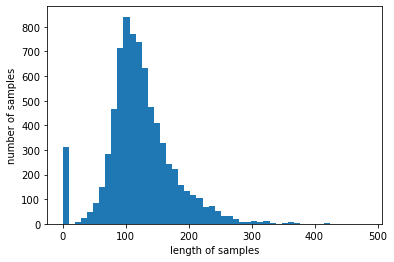

In [44]:
%matplotlib inline
# 가사 길이 분포 확인
print('가사의 최대 길이 :',max(len(l) for l in tokendata))
print('가사의 평균 길이 :',sum(map(len, tokendata))/len(tokendata))
plt.hist([len(s) for s in tokendata], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [45]:
## 단어중심의 임베딩 word2vec

In [46]:
len(tokendata)

7606

In [47]:
from gensim.models import Word2Vec
# model = Word2Vec(sentences = tokendata, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [48]:
##모델저장
from gensim.models import KeyedVectors
# model.wv.save_word2vec_format('musicword') # 모델 저장

In [49]:
# 모델 로드
model = KeyedVectors.load_word2vec_format("musicword") # 모델 로드

In [50]:
model.wv.vectors.shape

C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(7216, 100)

In [51]:
model.wv.most_similar("희망")

C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('절망', 0.8808263540267944),
 ('고독', 0.8503879308700562),
 ('영혼', 0.848429262638092),
 ('열정', 0.843435525894165),
 ('거름', 0.8327844142913818),
 ('소망', 0.830572247505188),
 ('끝없다', 0.8296473622322083),
 ('번의', 0.8256543278694153),
 ('무성', 0.8226009607315063),
 ('하나로', 0.8209983110427856)]

## Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

In [52]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

In [53]:
model.wv.vocab

C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


{'하다': <gensim.models.keyedvectors.Vocab at 0x153a84d2ec8>,
 '사랑': <gensim.models.keyedvectors.Vocab at 0x153a84d35c8>,
 '보다': <gensim.models.keyedvectors.Vocab at 0x153a84d2f08>,
 '없다': <gensim.models.keyedvectors.Vocab at 0x153a84d3548>,
 '있다': <gensim.models.keyedvectors.Vocab at 0x153a84d2f48>,
 '그대': <gensim.models.keyedvectors.Vocab at 0x153a84d3608>,
 '않다': <gensim.models.keyedvectors.Vocab at 0x153a84d2fc8>,
 '같다': <gensim.models.keyedvectors.Vocab at 0x153a84d3648>,
 '싶다': <gensim.models.keyedvectors.Vocab at 0x153a84d8048>,
 '그렇다': <gensim.models.keyedvectors.Vocab at 0x153a84d3688>,
 '모르다': <gensim.models.keyedvectors.Vocab at 0x153a84d2f88>,
 '나르다': <gensim.models.keyedvectors.Vocab at 0x153a84d36c8>,
 '처럼': <gensim.models.keyedvectors.Vocab at 0x153a84d8088>,
 '되다': <gensim.models.keyedvectors.Vocab at 0x153a84d3708>,
 '내다': <gensim.models.keyedvectors.Vocab at 0x153a84d80c8>,
 '버리다': <gensim.models.keyedvectors.Vocab at 0x153a84d3748>,
 '너무': <gensim.models.keyedvectors.V

In [54]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:200,:])

C:\Users\pdj10\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


7216
[ 0.5737132  -0.46238407  0.6215245   1.4229645   0.2724912   0.32252863
  1.8590953   0.31722924 -0.9032     -0.64427596]


In [55]:
tsne = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
tsne.shape

(200, 2)

In [56]:
tsne

x         y
하다    -3.003007  3.845356
사랑     3.622965  0.984801
보다    -1.497438  2.699832
없다    14.599696 -2.313243
있다     1.003654  2.366927
...         ...       ...
에도    10.554183 -1.892350
기분    11.508045 -6.802666
살아가다  -0.310355 -2.418501
먹다    -7.786602 -4.852108
이유    -0.706908 -2.059022

[200 rows x 2 columns]

In [57]:
## matplotlib 한글적용

In [58]:
import warnings
warnings.filterwarnings('ignore') #경고문자 무시

In [59]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
##그래프의 결과를 출력 세션에 나타나게 하기
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
 
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

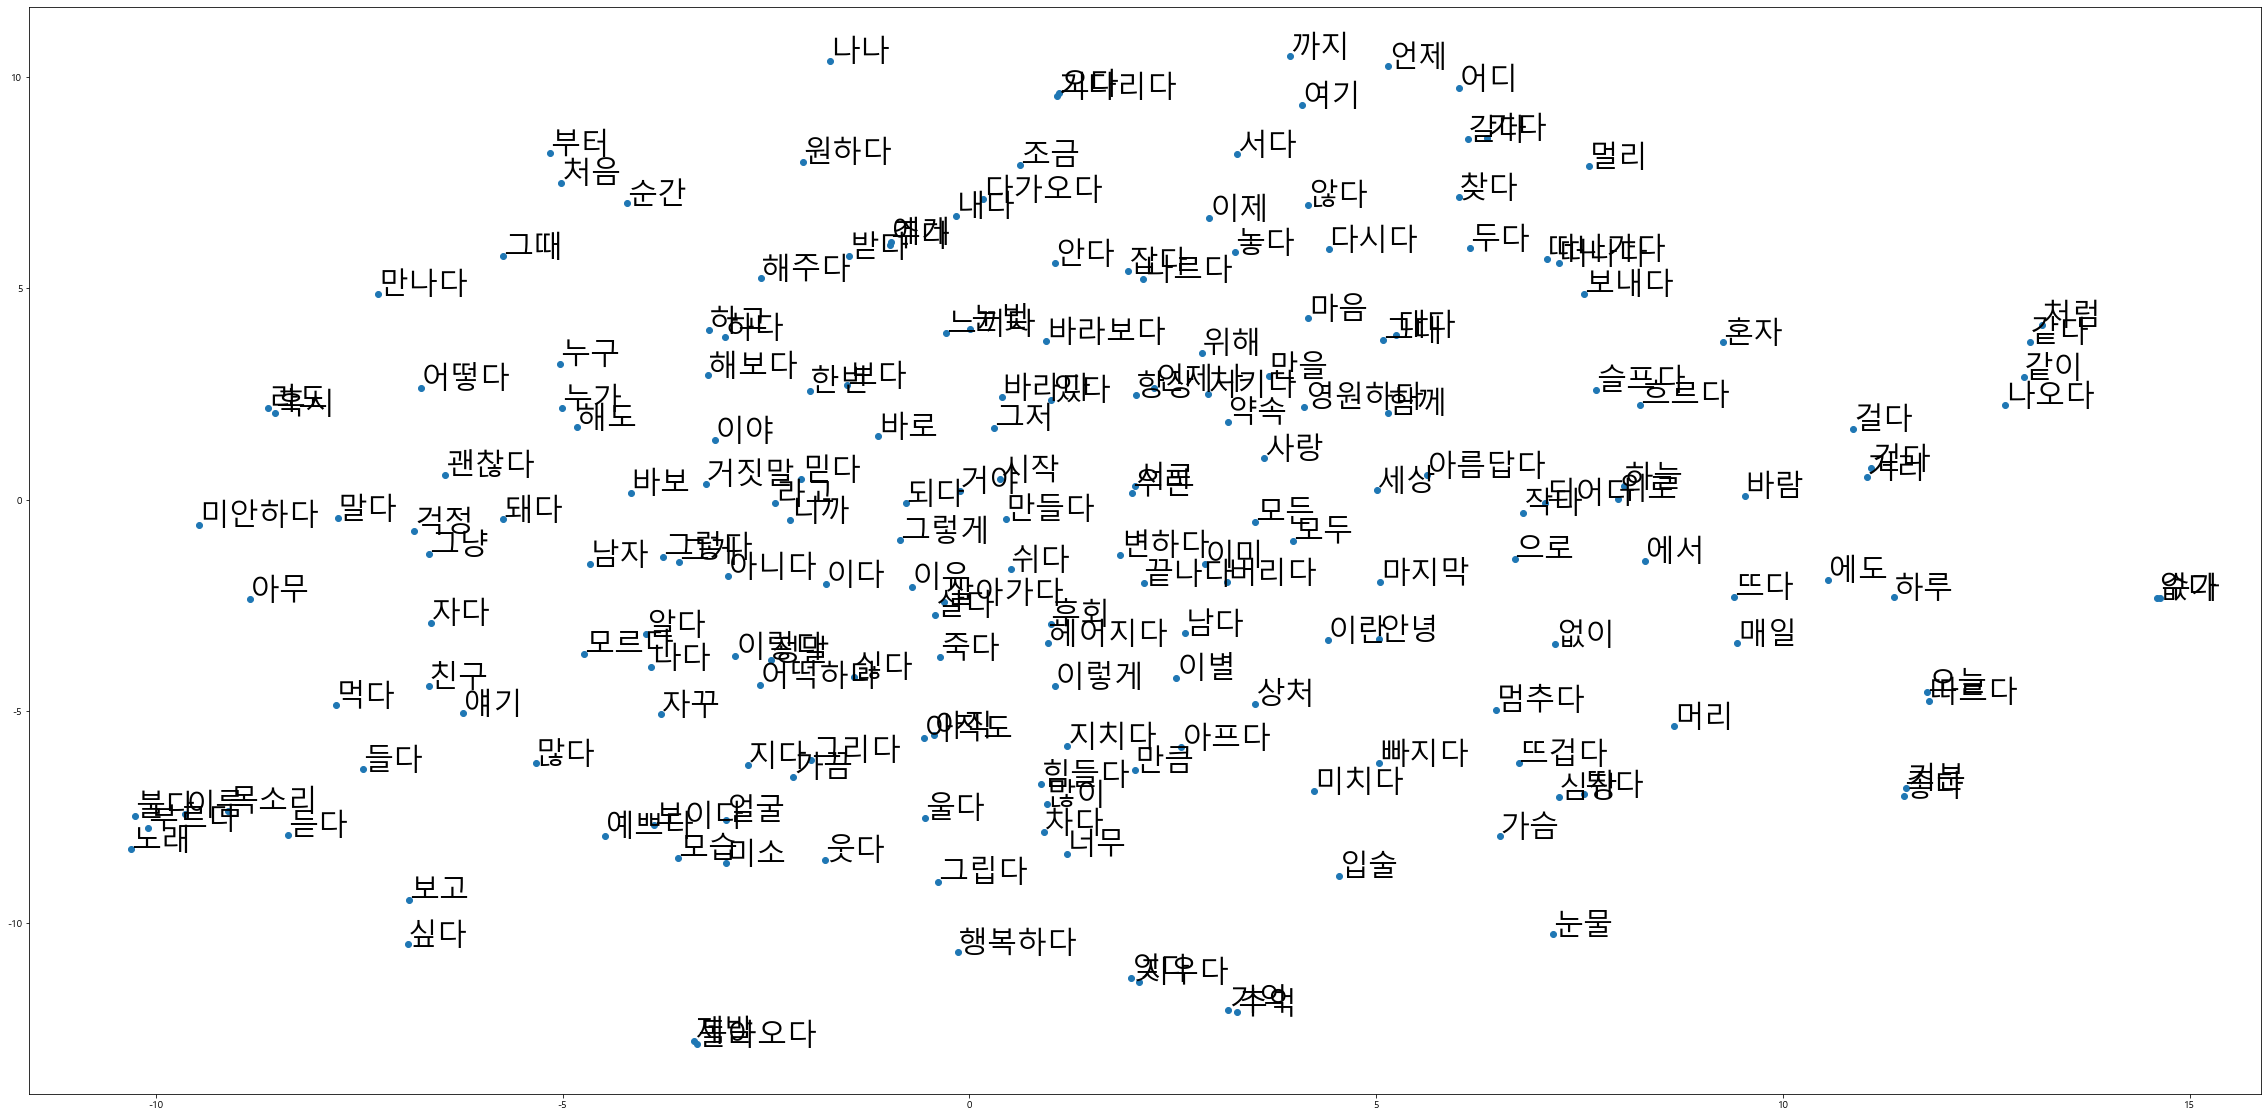

In [60]:
plt.rc('font', family=font_name) # For Windows
# print(plt.rcParams['font.family'])
%matplotlib inline
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tsne['x'], tsne['y'])

for word, pos in tsne.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [61]:
# 코사인유사도로 추천하기

In [62]:
model.wv.vectors[0]

array([ 0.5737132 , -0.46238407,  0.6215245 ,  1.4229645 ,  0.2724912 ,
        0.32252863,  1.8590953 ,  0.31722924, -0.9032    , -0.64427596,
        0.0076648 ,  0.36899623, -0.7469843 ,  0.5527127 ,  0.28290153,
       -0.8885697 ,  0.8728529 , -0.16601592, -0.51584   ,  0.92239493,
       -0.8939199 ,  1.1274847 ,  0.61283743,  0.6261988 ,  0.06207606,
        0.42668507,  1.6326916 , -0.83850306, -0.2960992 , -0.06114249,
        0.8883833 ,  0.23067129,  0.6303527 , -0.3390379 , -0.11048088,
       -0.02406885,  0.01357709,  0.21770895,  0.58379644,  0.66547143,
       -0.6119545 , -1.1434072 ,  0.23263153,  0.5027193 ,  0.04939885,
       -0.40409112, -0.8798738 ,  0.438704  ,  0.40454388, -1.4468577 ,
       -0.10595767, -1.4459772 , -0.02181655,  0.09952959, -0.0773644 ,
       -0.11052643,  0.10497899, -0.11086337, -1.1467903 , -0.02288239,
        0.27417058, -0.25052932,  0.74368745,  0.8118798 ,  0.42039013,
        0.22544758, -0.5574233 ,  1.17697   , -0.68495846,  0.86

In [63]:
df

code         name               artist     genre  \
0     31532643         넘쳐흘러  엠씨더맥스 (M.C the MAX)       발라드   
1     31532438       벌써 12시                   청하        댄스   
2     31477685         180도                    벤       발라드   
3     31406357          신용재                   하은       발라드   
4     31417871         SOLO          제니 (JENNIE)      랩/힙합   
...        ...          ...                  ...       ...   
7601  32620704      Poppin'        백현 (BAEKHYUN)  R&B/Soul   
7602  32620703   Underwater        백현 (BAEKHYUN)  R&B/Soul   
7603  32665408          작사가          헤이즈 (Heize)  R&B/Soul   
7604  32620701  R U Ridin'?        백현 (BAEKHYUN)  R&B/Soul   
7605  32620705        Ghost        백현 (BAEKHYUN)  R&B/Soul   

                                                  lyric        date  
0     나는 그대를 뒤로한 채로우리 사랑을 놓아요차오르는 추억을 헝클어뜨려모두 일어나지 않...  2019.01.02  
1        네가 말을 놓는 것도  너의 작은 말투도나쁘지 않은걸        말없이 손을...  2019.01.02  
2     사랑 다 비슷해 그래 다 비슷해너는 다르길 바랐는데넌 뭐가 미안해 왜 맨날 미안해헤...  2018.12.07  
3     매일 같은 옷을 입는 이유 너와 함께 입던 옷이라서혹시 어디선가 알아보고 날 찾아줄...  2018.11.06  
4     천진난만 청순가련새침한 척 이젠 지쳐 나귀찮아매일 뭐 해 어디야 밥은 잘 자 자기 ...  2018.11.12  
...                                                 ...         ...  
7601  너는 들을수록자꾸 좋아지는 노래보고 또 봐도 귀여운사랑스런 영화 같은데커플들의 클리...  2020.05.25  
7602  귀찮게 또 울린 잠깐  불 꺼진 방에 홀로 눈 감은 채어둠뿐인 정적 아래 가라앉게 ...  2020.05.25  
7603  천사와 악마가 내 손끝에 웃어도 울어도 가사를 적네 종이가 다 젖어도 나는 멈추지 ...  2020.06.10  
7604  가볍게 널 스치는 바람이 좋아 보여그 표정을 읽을 수는 없는데크게 튼 음악 볼륨 속...  2020.05.25  
7605  넌 고요한 정적이 감싸면 꿈속에가둬 날 깊숙이 더욱 깊숙이또 가만히 밀려와 잔잔한 ...  2020.05.25  

[7606 rows x 6 columns]

In [64]:
df['vector'] =model.wv.vectors

ValueError: Length of values does not match length of index

In [65]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(model.wv.vectors,model.wv.vectors)

In [66]:
cosine_sim.shape

(7216, 7216)

In [67]:
## tf-idf로 단어 발생빈도에 따른 벡터화 진행

In [68]:
## 가사 리스트로 만들기

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
tfidf_matrix = tfidf_vectorizer.fit_transform(df.lyric) #문장 벡터화 진행
idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

{'ㄱㄱ': 9.243676974437356, 'ㄱㅅ': 9.243676974437356, 'ㄱ그냥': 9.243676974437356, 'ㅂㅂㅂ정리하고': 9.243676974437356, 'ㅇㅇ': 9.243676974437356, 'ㅋㅋ': 9.243676974437356, 'ㅋ손끝이': 9.243676974437356, 'ㅎㅎ되게': 9.243676974437356, 'ㅎㅎ아주아주': 9.243676974437356, '가가가십걸마하의': 9.243676974437356, '가가슴에': 9.243676974437356, '가가지마': 9.243676974437356, '가거나': 9.243676974437356, '가거든': 9.243676974437356, '가거라': 9.243676974437356, '가건': 8.838211866329193, '가겉': 9.243676974437356, '가게': 6.502836950512155, '가게내게': 9.243676974437356, '가게들이': 9.243676974437356, '가게로': 9.243676974437356, '가게를': 9.243676974437356, '가게마지막': 9.243676974437356, '가게모두': 9.243676974437356, '가게신프로': 9.243676974437356, '가게에서': 8.838211866329193, '가게에서담배': 8.838211866329193, '가게에서새': 9.243676974437356, '가게하필': 9.243676974437356, '가겠다': 9.243676974437356, '가겠다너에게': 9.243676974437356, '가겠다는': 8.838211866329193, '가겠다는데내': 9.243676974437356, '가겠어': 8.3273862425632, '가겠어그렇게': 9.243676974437356, '가겠어너': 9.243676974437356, '가겠어올라갈': 9.243676974437356, '가

In [88]:
tfidf_vectorizer.idf_.shape

(212267,)

In [73]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2]) #첫번째와 두번째 문장 비교
#array([[0.113]])

array([[0.00816356]])

In [75]:
tfidf_matrix[0:1]

<1x212295 sparse matrix of type '<class 'numpy.float64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [68]:
## 노래제목을 적으면 거기에 맞는 토픽에 따른 노래추천

In [ ]:
## 노래에 맞는 키워드 토픽 모델링

In [ ]:
## 키워드를 적으면 텍스트 유사도에 기반한 노래추천

In [ ]:
# 키워드와 유사한 단어 

In [ ]:
## 키워드와 유사한 단어들을 문장으로 구성 그 문장과 연관성이있는 가사 추천

In [38]:
## 문장중심의 임베딩 elmo, bert